# 08wk-1: 에너지사용량 시각화

최규빈  
2023-10-23

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/08wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

[????](????)

# 2. Imports

In [19]:
import pandas as pd 
import numpy as np
from plotnine import *

# 3. 예비학습

## A. `pd.concat()`

`# 예시1` – 위아래로

In [50]:
df1 = pd.DataFrame({'A':[1,2,3],'B':[2,3,4]})
df2 = pd.DataFrame({'A':[-1,-2,-3],'B':[-2,-3,-4]})

In [51]:
display("df1",df1)
display("df2",df2)

In [58]:
#pd.concat([df1,df2],axis=0) # (3,2) concat (3,2) -> (6,4) 
pd.concat([df1,df2])

인덱스를 재정리하고 싶다면?

In [59]:
pd.concat([df1,df2]).reset_index(drop=True)

`#`

`# 예시2` – 좌우로

In [60]:
df1 = pd.DataFrame({'A':[1,2,3],'B':[2,3,4]})
df2 = pd.DataFrame({'C':[-1,-2,-3],'D':[-2,-3,-4]})

In [61]:
display("df1",df1)
display("df2",df2)

In [63]:
pd.concat([df1,df2],axis=1) # (3,2) concat (3,2) -> (3,4) 

`#`

## B. `pd.merge()`

In [359]:
big = pd.DataFrame({'department':['A','A','B','B'], 'gender':['male','female','male','female'],'count':[1,2,3,1]})
small = pd.DataFrame({'department':['A','B'], 'total':[3,4]})

In [361]:
display("big",big)
display("small",small)

In [362]:
big.merge(small)

In [363]:
small.merge(big)

## C. `.applymap()`

`# 예시1`

In [76]:
np.random.seed(43052)
df = pd.DataFrame({'A':np.random.rand(3), 'B':np.random.rand(3)})
df

In [77]:
df.applymap(lambda x: 'Yes' if x>0.5 else 'No')

/tmp/ipykernel_288950/1665022133.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

`#`

## D. `df.astype()`

`-` 예시1

In [96]:
df = pd.DataFrame({'A':[0,1,2],'B':[4,5,6]})
df

In [98]:
df.astype(float)

## E. 제 아픈기억

`# 예제1` – object형은 일괄적으로 문자형임을 의미하는게 아님

In [89]:
np.random.seed(43052)
df = pd.DataFrame({'A':['1','2','0','1',2], 'B':['2','3','0','0',0]})
df

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       5 non-null      object
 1   B       5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes

In [90]:
df.A[0],df.A[4],df.B[0],df.B[4]

`#`

`# 예제2` – column이름이 이상하게 들어가 있는 경우가 있음.

In [332]:
df = pd.DataFrame({('A',''):[0,0,0], ('B',''):[1,1,1]})
df

In [333]:
df['A']

In [326]:
df[('A','')]

`#`

# 4. 에너지사용량 시각화

아래는 2019년 서울의 에너지사용량을 불러오는 예시코드이다.

In [26]:
pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv')

에너지 사용량은 2018년부터 2021년까지의 기간 동안 서울, 부산 등 여러
지역에 대해 정리되어 있으며, 아래 주소 형식으로 저장되어 있다.

    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2021.csv
    ...
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2021.csv

아래의 `url`, `prov`를 참고하여 모든 자료를 불러온 뒤 `pd.concat()`을
이용하여 하나의 df로 합쳐라.

In [306]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'

prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']

올바르게 정리된 데이터프레임의 예시는 아래와 같다.

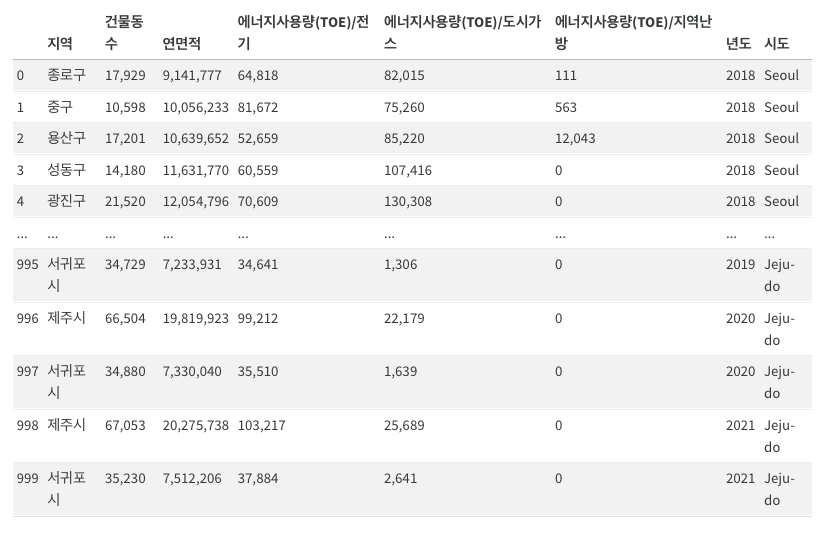

(풀이)

In [336]:
df = pd.concat([pd.read_csv(url.format(p+y)).assign(년도=y, 시도=p) for p in prov for y in ['2018', '2019', '2020', '2021']]).reset_index(drop=True)
df

`(2)` 의미상 숫자형이지만 문자형으로 입력이된 자료를 모두 전처리하라.

(풀이)

In [173]:
df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()

/tmp/ipykernel_288950/1450993263.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

`(3)` 열의 이름을 아래와 같이 바꾸라.

In [174]:
name_dict = {
    '년도': 'Year',
    '시도': 'Prov',
    '지역': 'Reg',
    '건물동수': 'BldgCount',
    '연면적': 'Area',
    '에너지사용량(TOE)/전기': 'Elec',
    '에너지사용량(TOE)/도시가스': 'Gas',
    '에너지사용량(TOE)/지역난방': 'Heat'
}

(풀이)

In [175]:
df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)

/tmp/ipykernel_288950/4155741766.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

`(4)` 아래와 같은 그림을 시각화 하라.

In [365]:
# 시각화예시

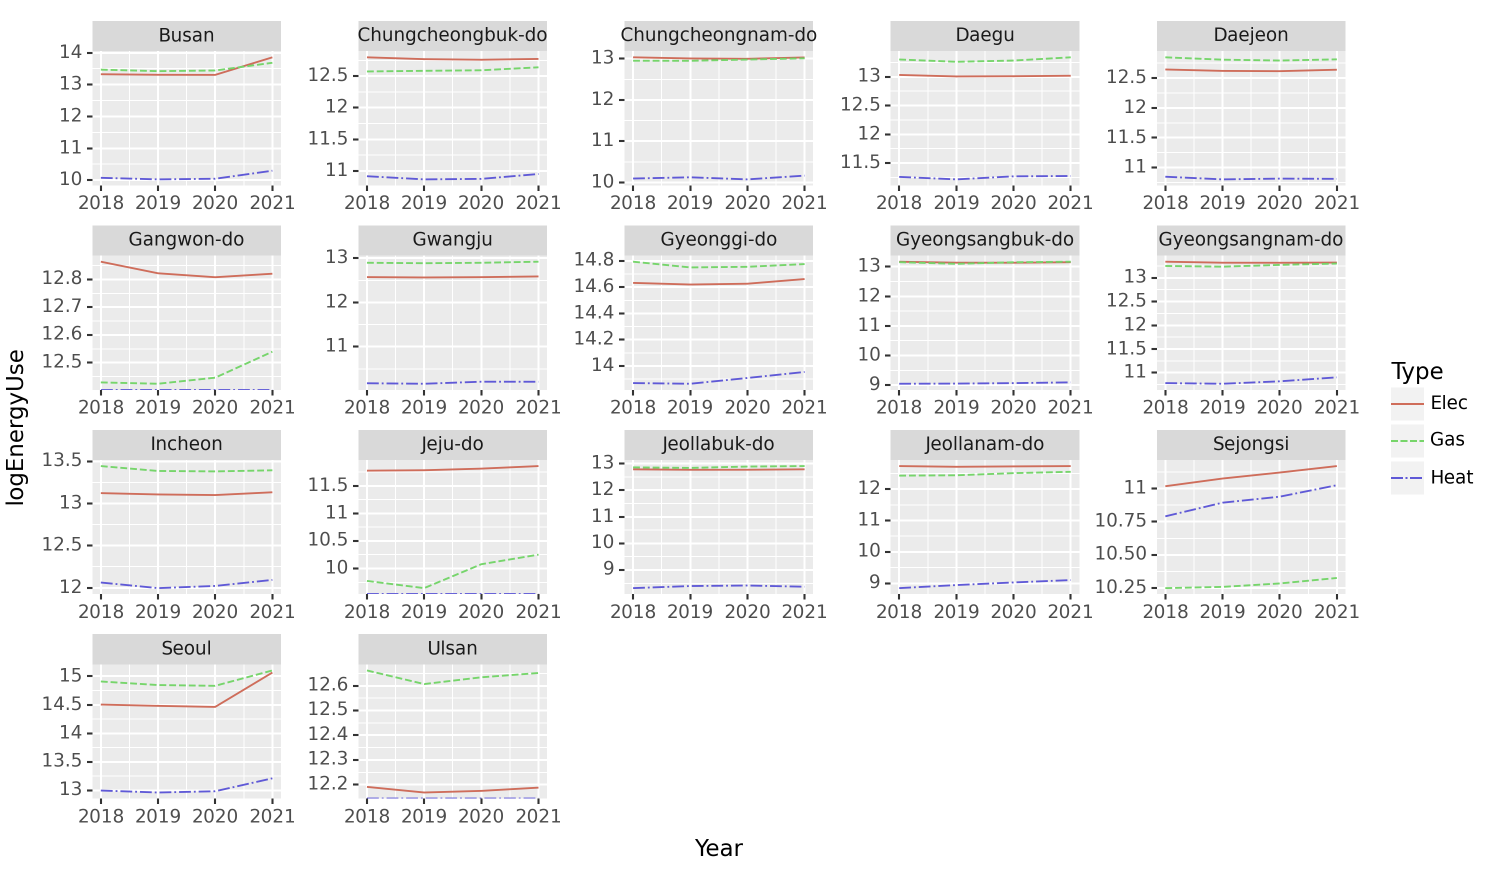

(풀이)

/tmp/ipykernel_288950/2550293754.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log

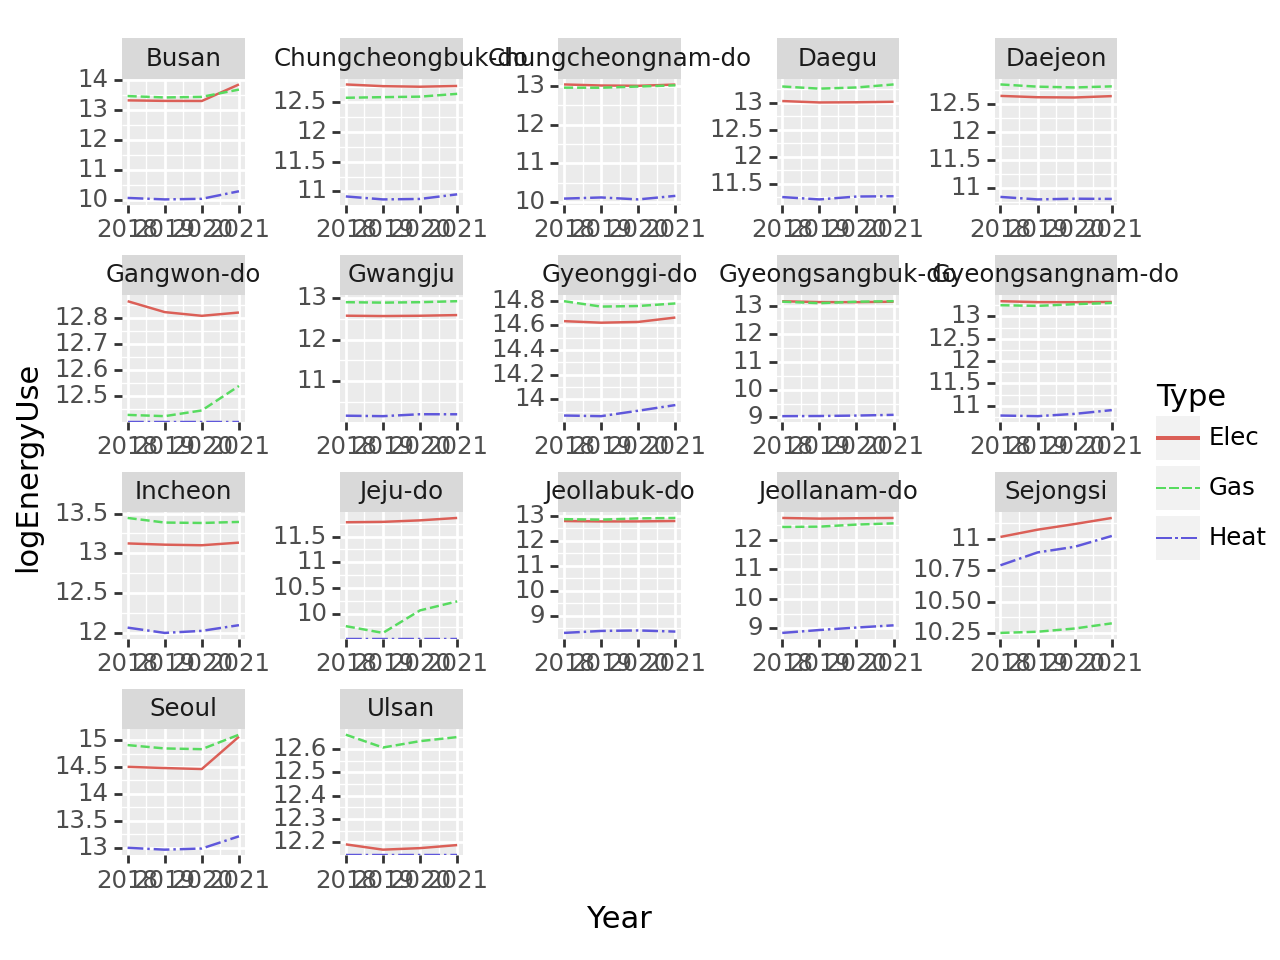

In [176]:
tidydata = df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)\
    .set_index(['Year','Prov','Reg','BldgCount','Area']).stack().reset_index().rename({'level_5':'Type',0:'EnergyUse'},axis=1)\
    .pivot_table(index=['Prov','Year'],columns='Type',values='EnergyUse',aggfunc='sum').stack().reset_index().rename({0:'EnergyUse'},axis=1)\
    .eval('logEnergyUse=log(EnergyUse)')

#---#
tidydata
fig = ggplot(tidydata)+geom_line(aes(x='Year',y='logEnergyUse',color='Type',linetype='Type'))+facet_wrap('Prov',scales='free')
fig

-   그림이 짜증나게 보임

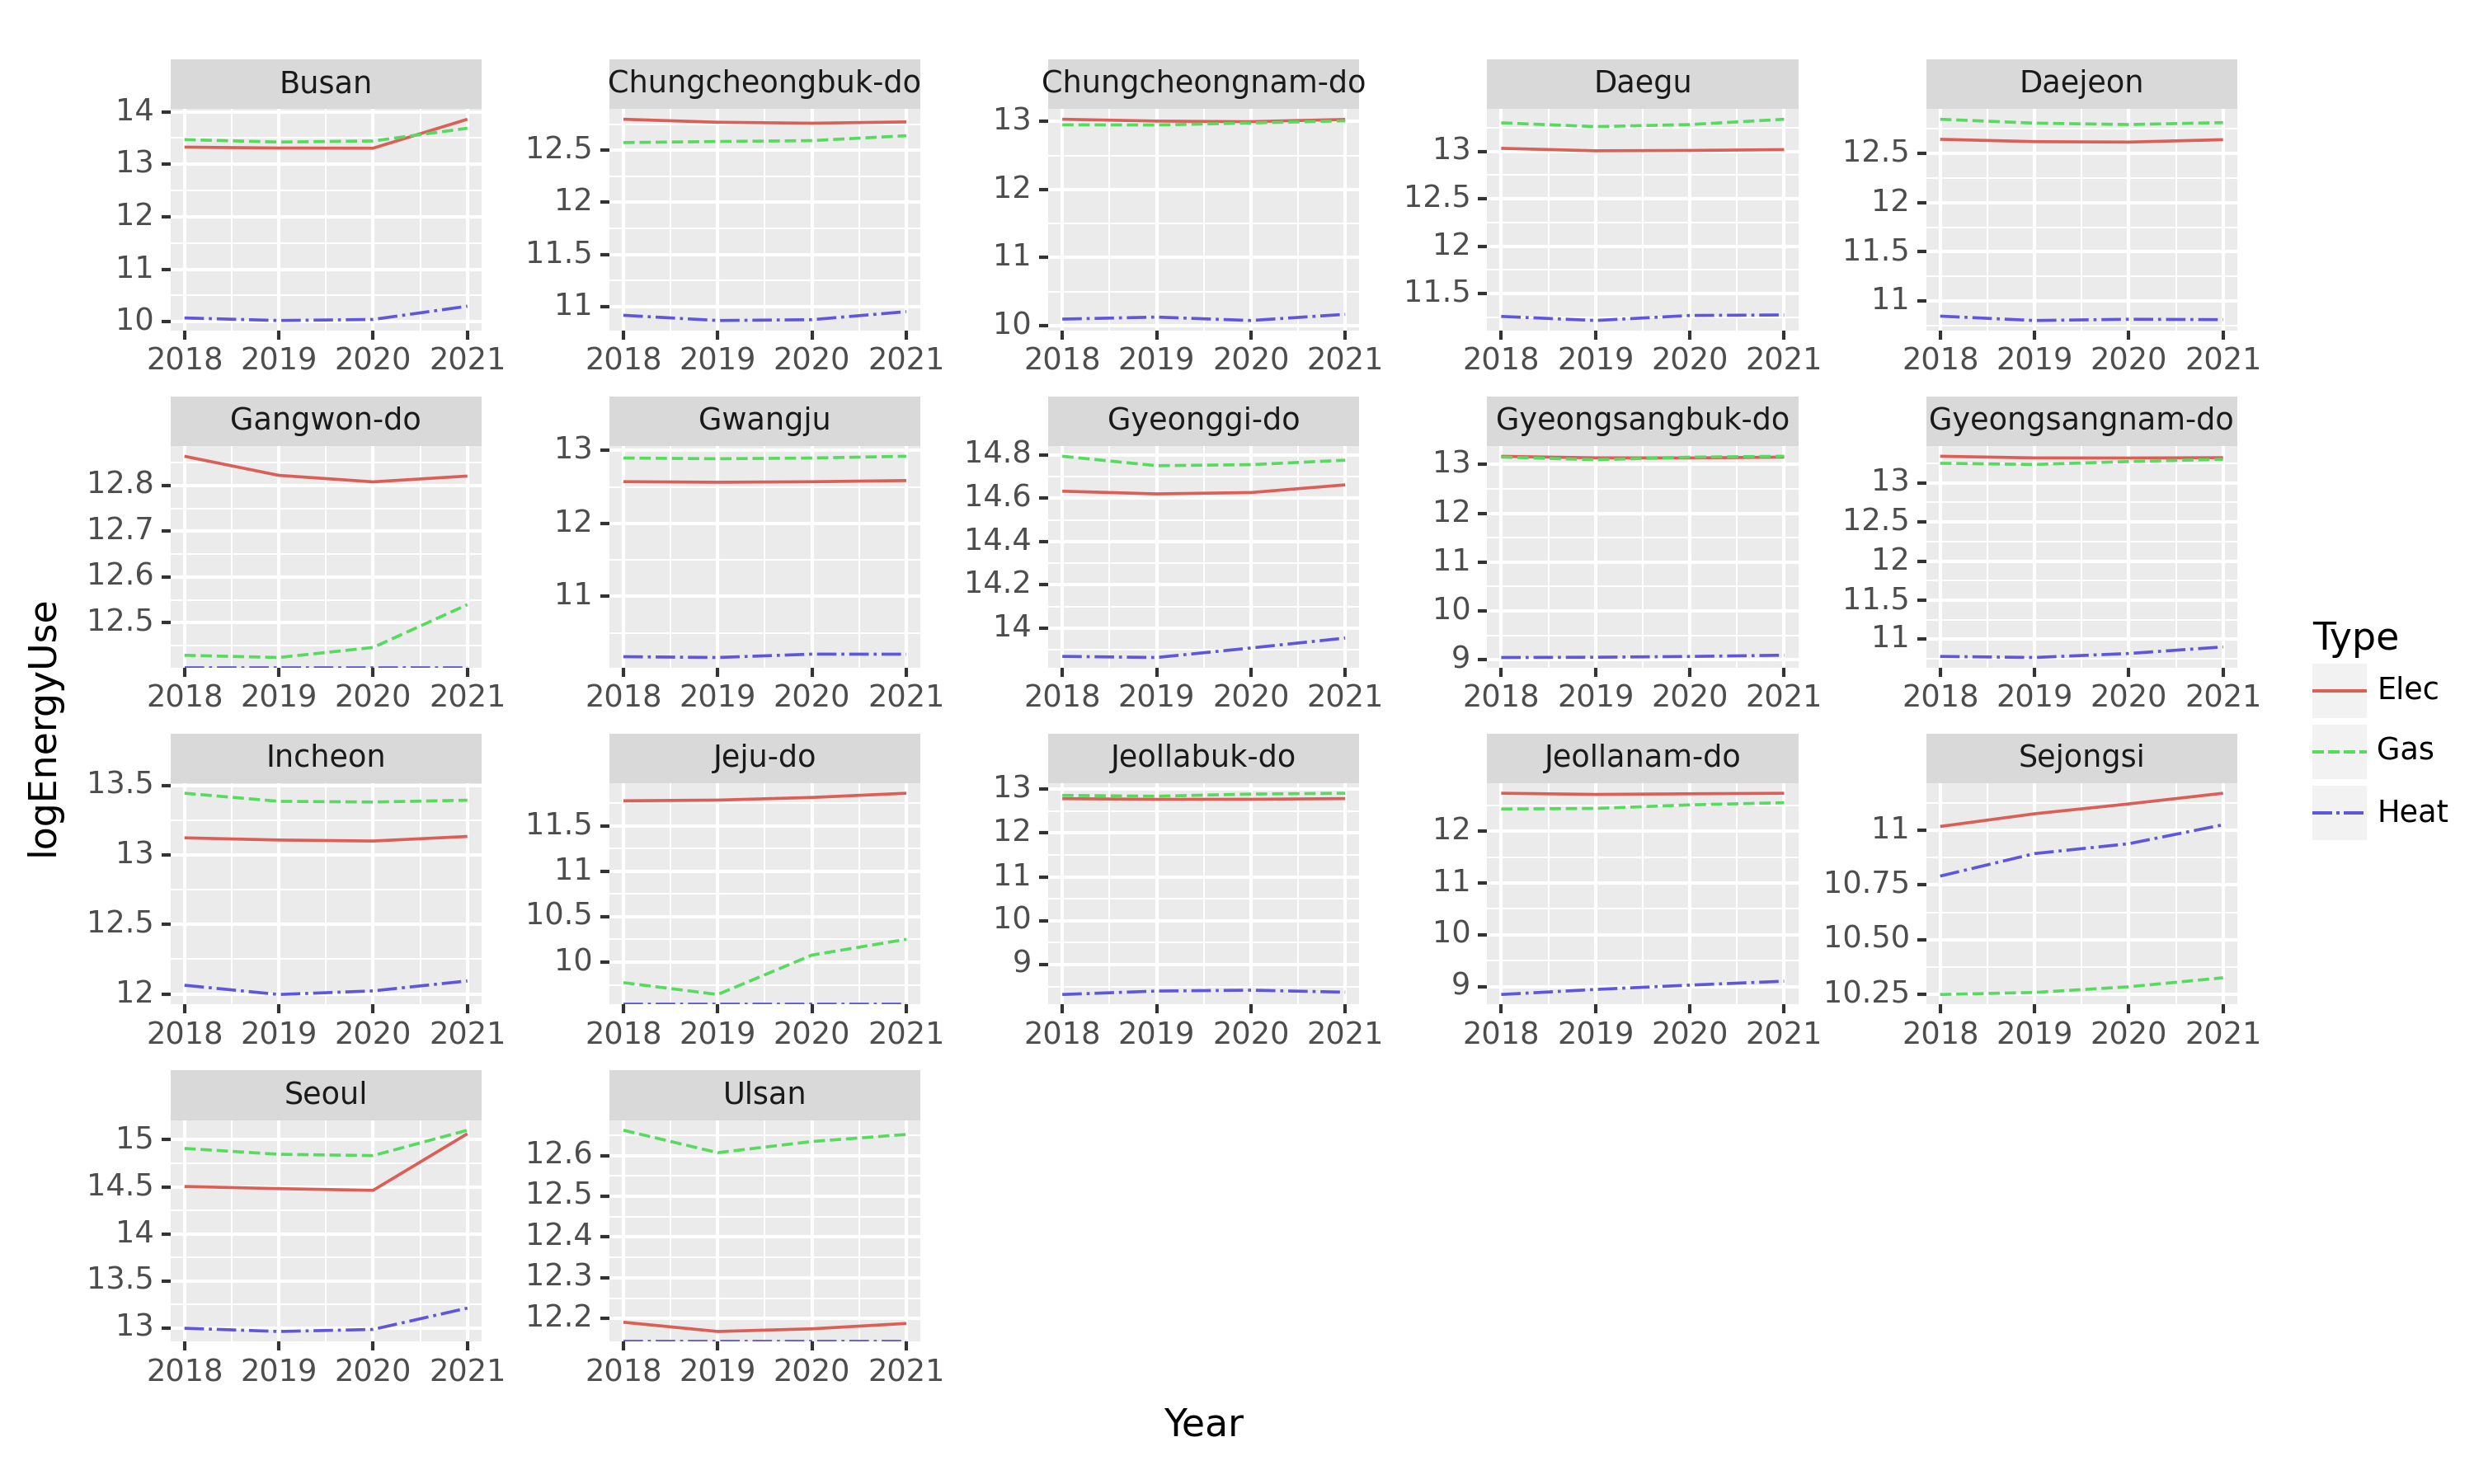

In [177]:
fig = fig.draw()
fig.set_size_inches(10,6)
fig.set_dpi(150)
fig

`(5)` `Prov`별로 총 에너지사용량이 많은 상위5개의 `Reg`을 찾고 아래와
같이 시각화 하라.

In [366]:
# 시각화예시

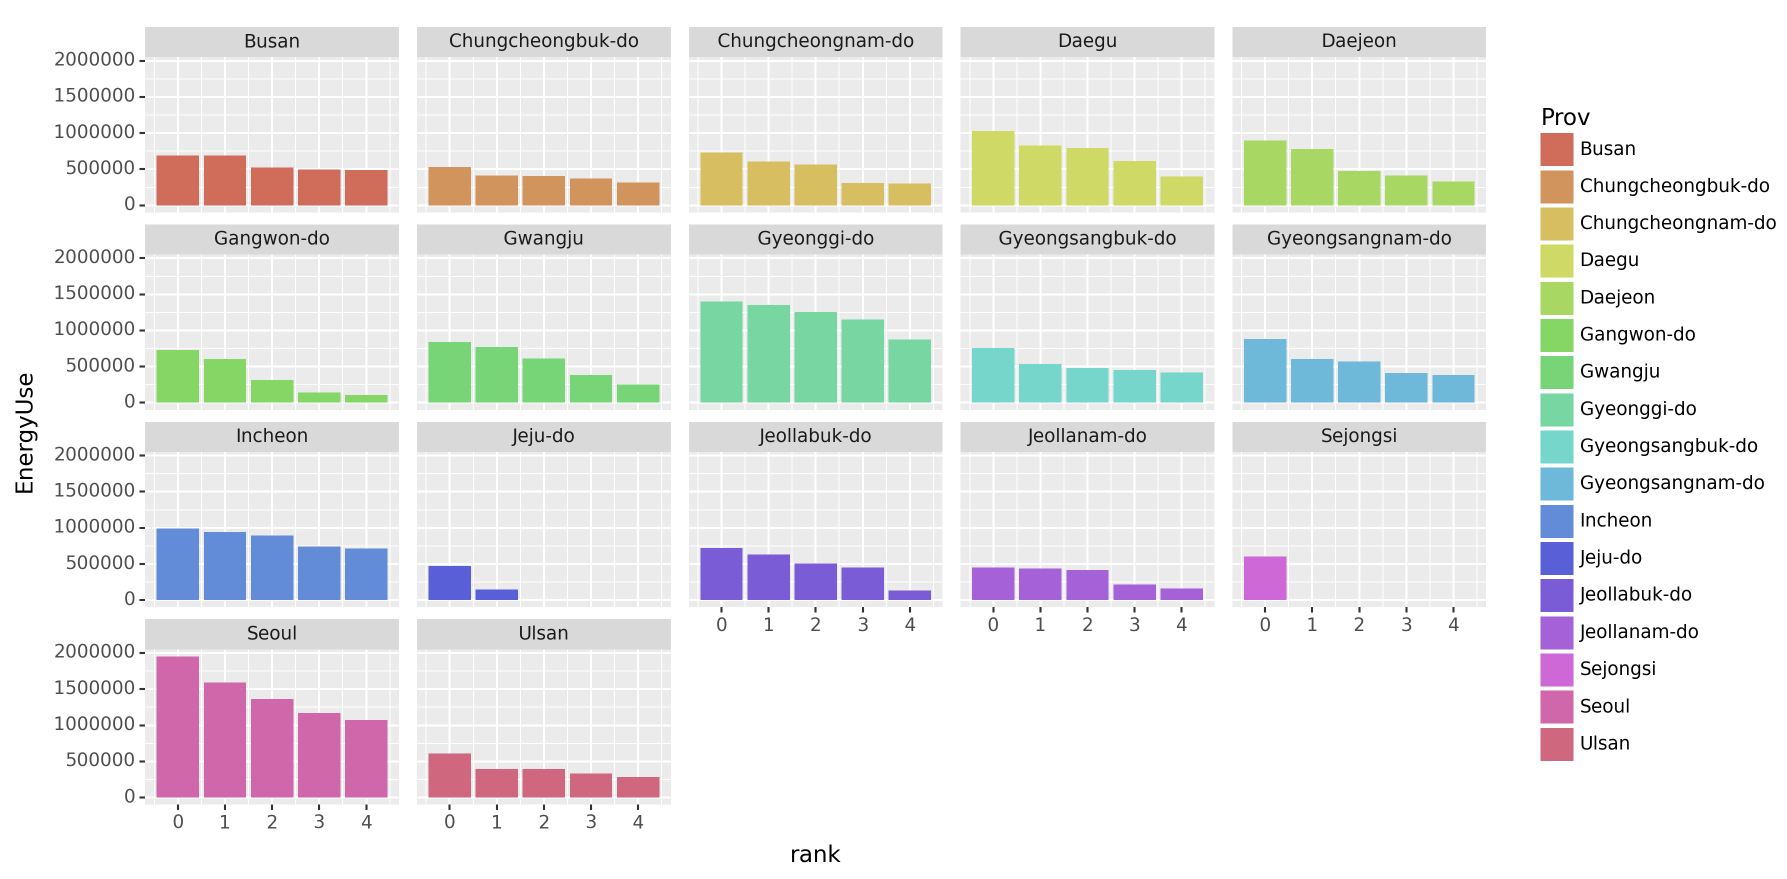

(풀이)

In [178]:
g = df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)\
    .drop(['BldgCount','Area'],axis=1)\
    .set_index(['Year','Prov','Reg']).sum(axis=1).reset_index().rename({0:'EnergyUse'},axis=1)\
    .pivot_table(index=['Prov','Reg'],columns='Year').sum(axis=1).reset_index().rename({0:'EnergyUse'},axis=1)\
    .groupby('Prov')

/tmp/ipykernel_288950/2120937695.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

In [179]:
tidydata = pd.concat([df.sort_values('EnergyUse',ascending=False).iloc[:5].reset_index(drop=True).reset_index().rename({'index':'Rank'},axis=1) for k,df in g])
tidydata 

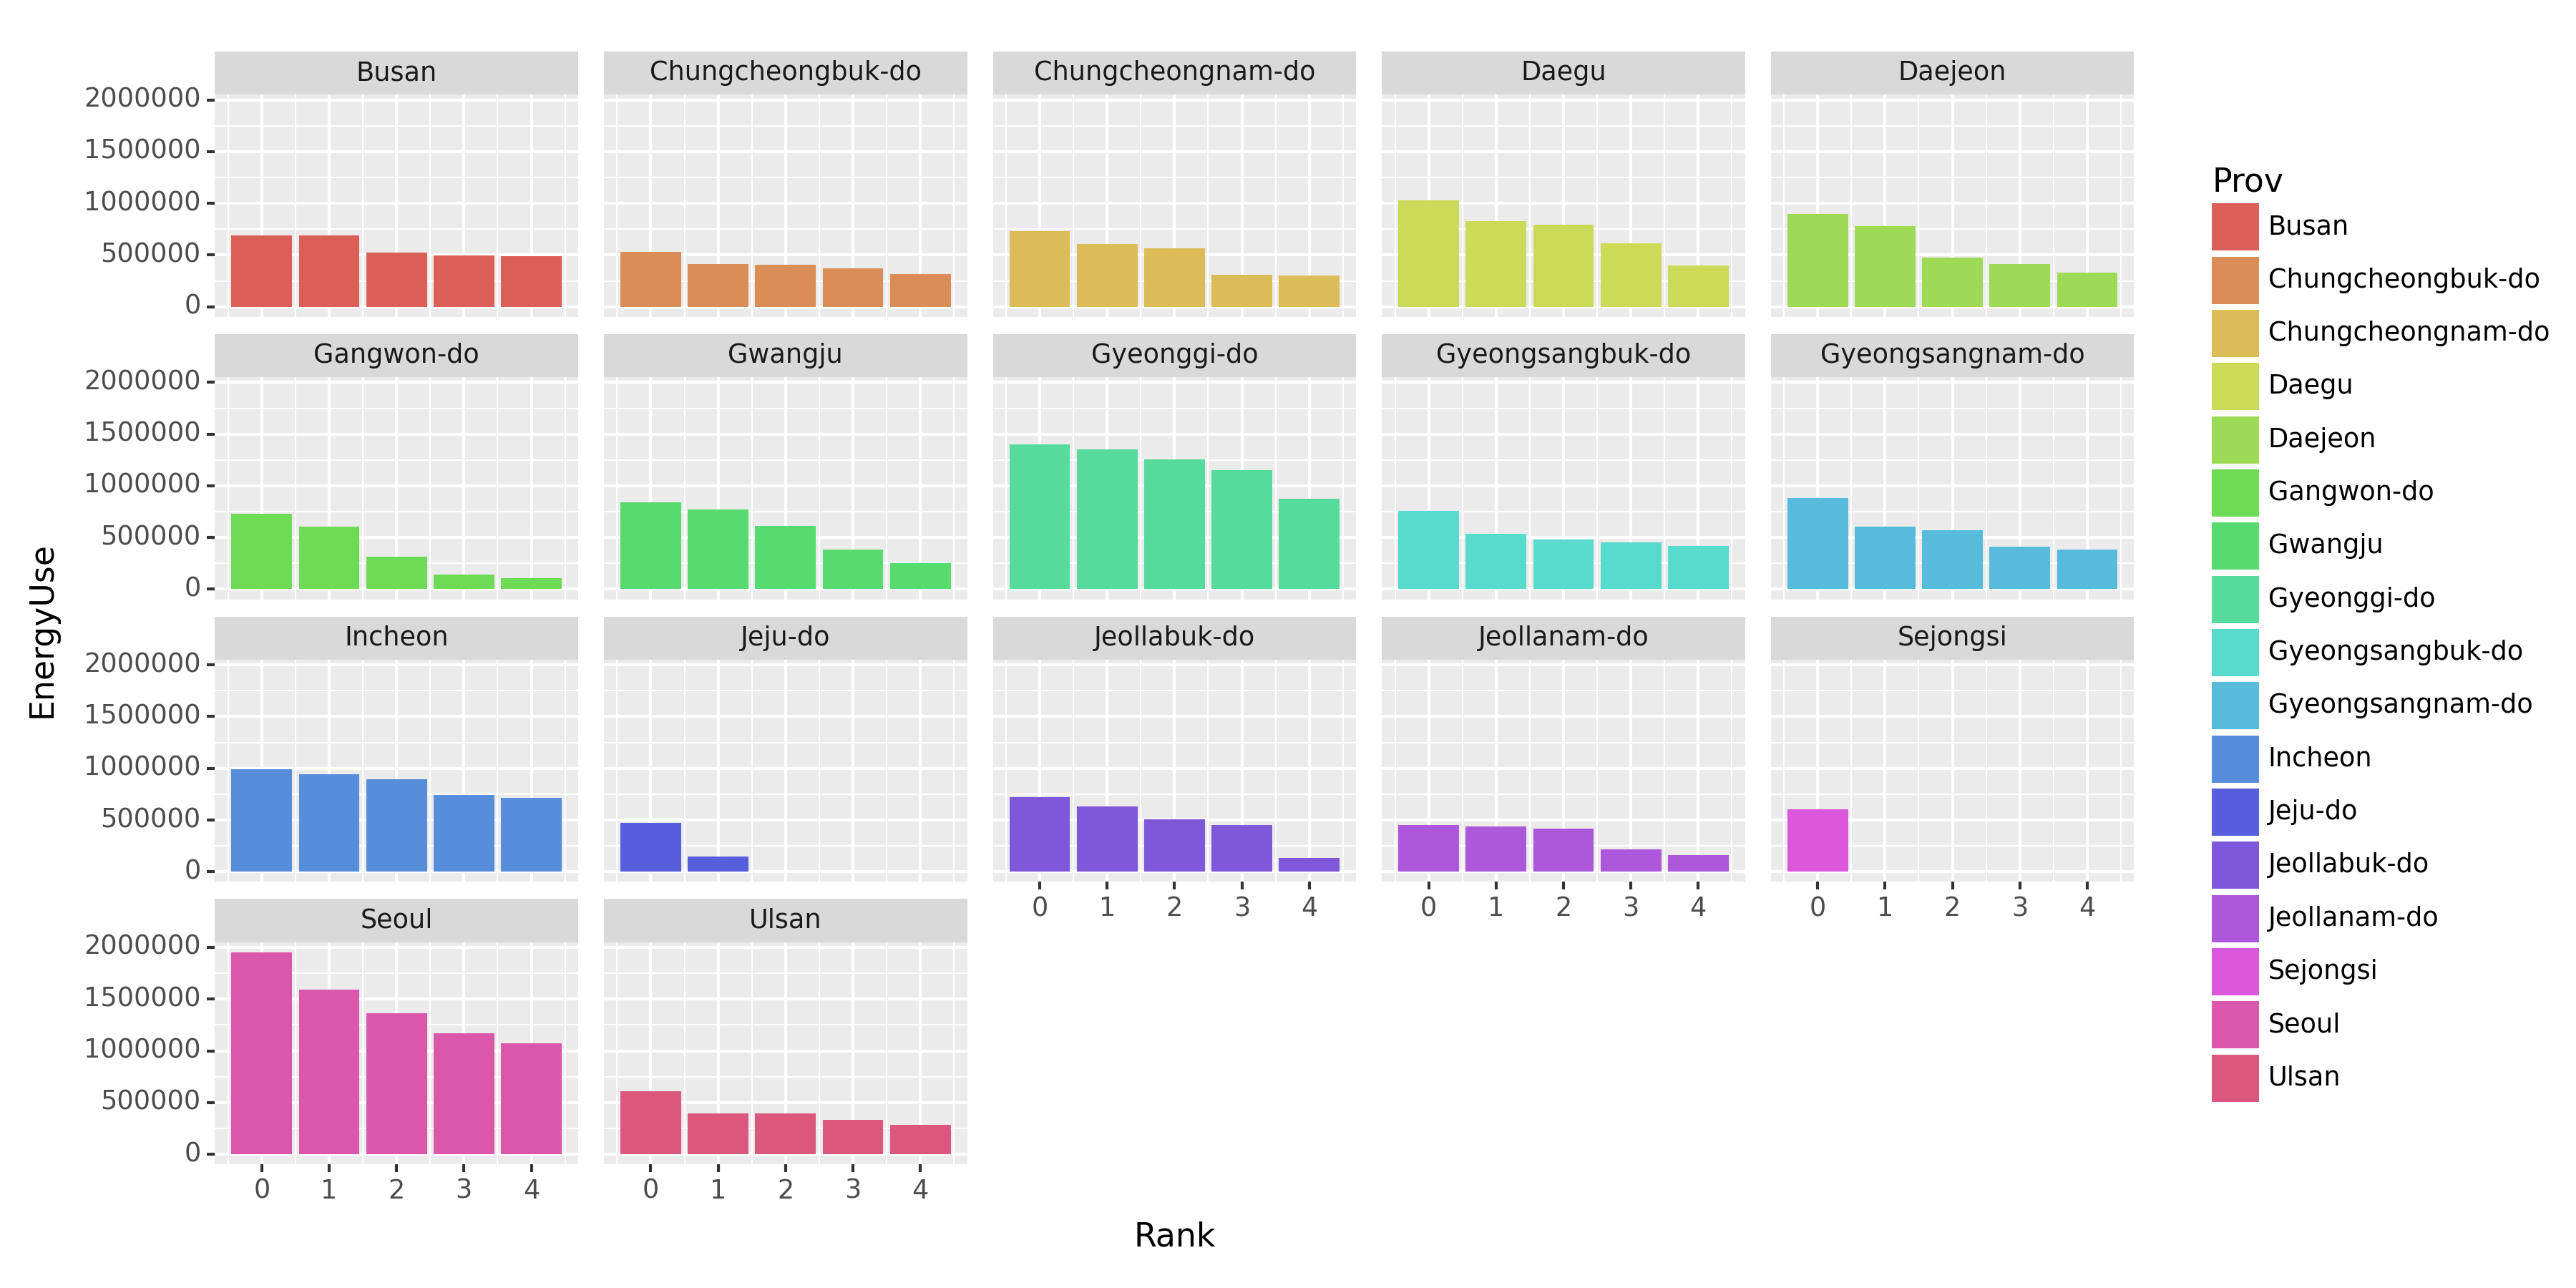

In [181]:
fig = ggplot(tidydata) + geom_col(aes(x='Rank',y='EnergyUse',fill='Prov'))+facet_wrap('Prov')
fig = fig.draw()
fig.set_size_inches(12,6)
fig.set_dpi(150)
fig

`(5)` (`Prov`,`Year`)별 전기에너지 사용량 비율을 구하고 아래와 같이
시각화 하라. + 제주를 제외한 지역으로 한정하고 시각화하라.

In [364]:
# 시각화예시

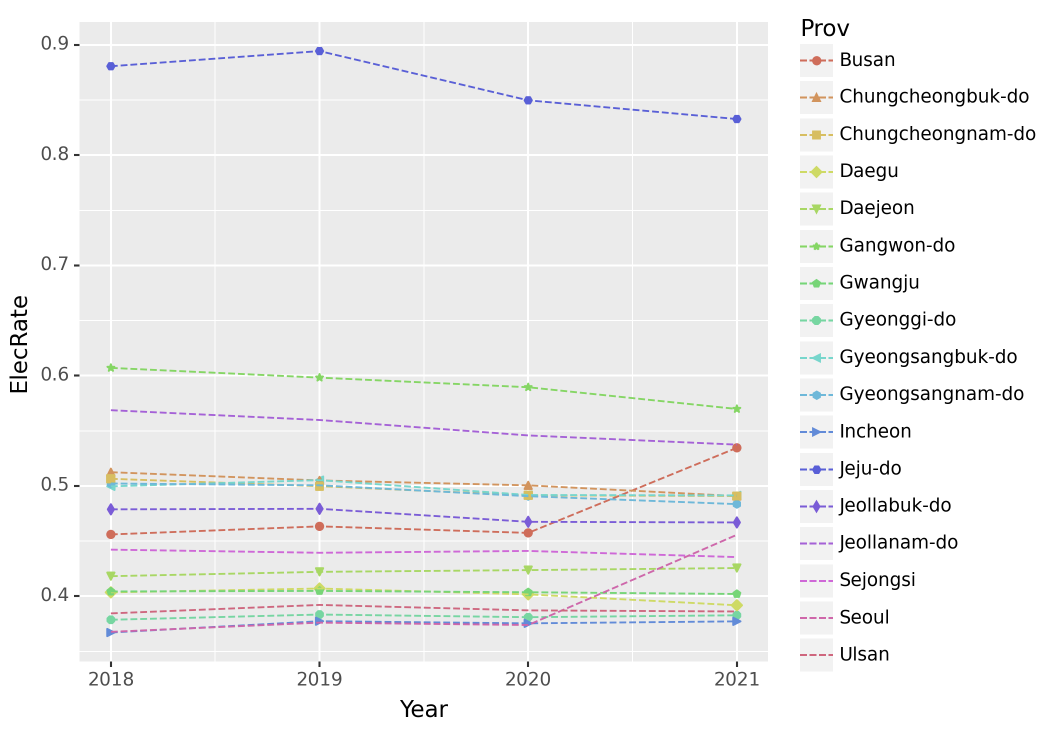

(풀이)

In [310]:
df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)\
    .drop(['BldgCount','Area'],axis=1)\
    .melt(id_vars=['Year','Prov','Reg']).rename({'variable':'Type','value':'EnergyUse'},axis=1)\
    .pivot_table(index=['Year','Prov','Type'],values='EnergyUse',aggfunc='sum').reset_index()\
    .set_index(['Year','Prov','Type']).unstack()\
    .assign(ElecRate = lambda df: df[('EnergyUse','Elec')]/(df[('EnergyUse','Elec')]+df[('EnergyUse','Gas')]+df[('EnergyUse','Heat')]))\
    .iloc[:,-1].reset_index().set_axis(['Year','Prov','ElecRate'],axis=1)

/tmp/ipykernel_288950/2924150206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

In [294]:
tidydata = df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)\
    .drop(['BldgCount','Area'],axis=1)\
    .melt(id_vars=['Year','Prov','Reg']).rename({'variable':'Type','value':'EnergyUse'},axis=1)\
    .pivot_table(index=['Year','Prov','Type'],values='EnergyUse',aggfunc='sum').reset_index()\
    .set_index(['Year','Prov','Type']).unstack()\
    .assign(ElecRate = lambda df: df[('EnergyUse','Elec')]/(df[('EnergyUse','Elec')]+df[('EnergyUse','Gas')]+df[('EnergyUse','Heat')]))\
    .iloc[:,-1].reset_index().set_axis(['Year','Prov','ElecRate'],axis=1)

/tmp/ipykernel_288950/3275607378.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

In [295]:
tidydata

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/mizani/palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 17 values requested.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 16 rows containing missing values.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/mizani/palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 17 values requested.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/guides/guides.py:259: PlotnineWarning: geom_point legend : Removed 4 rows containing missing values.

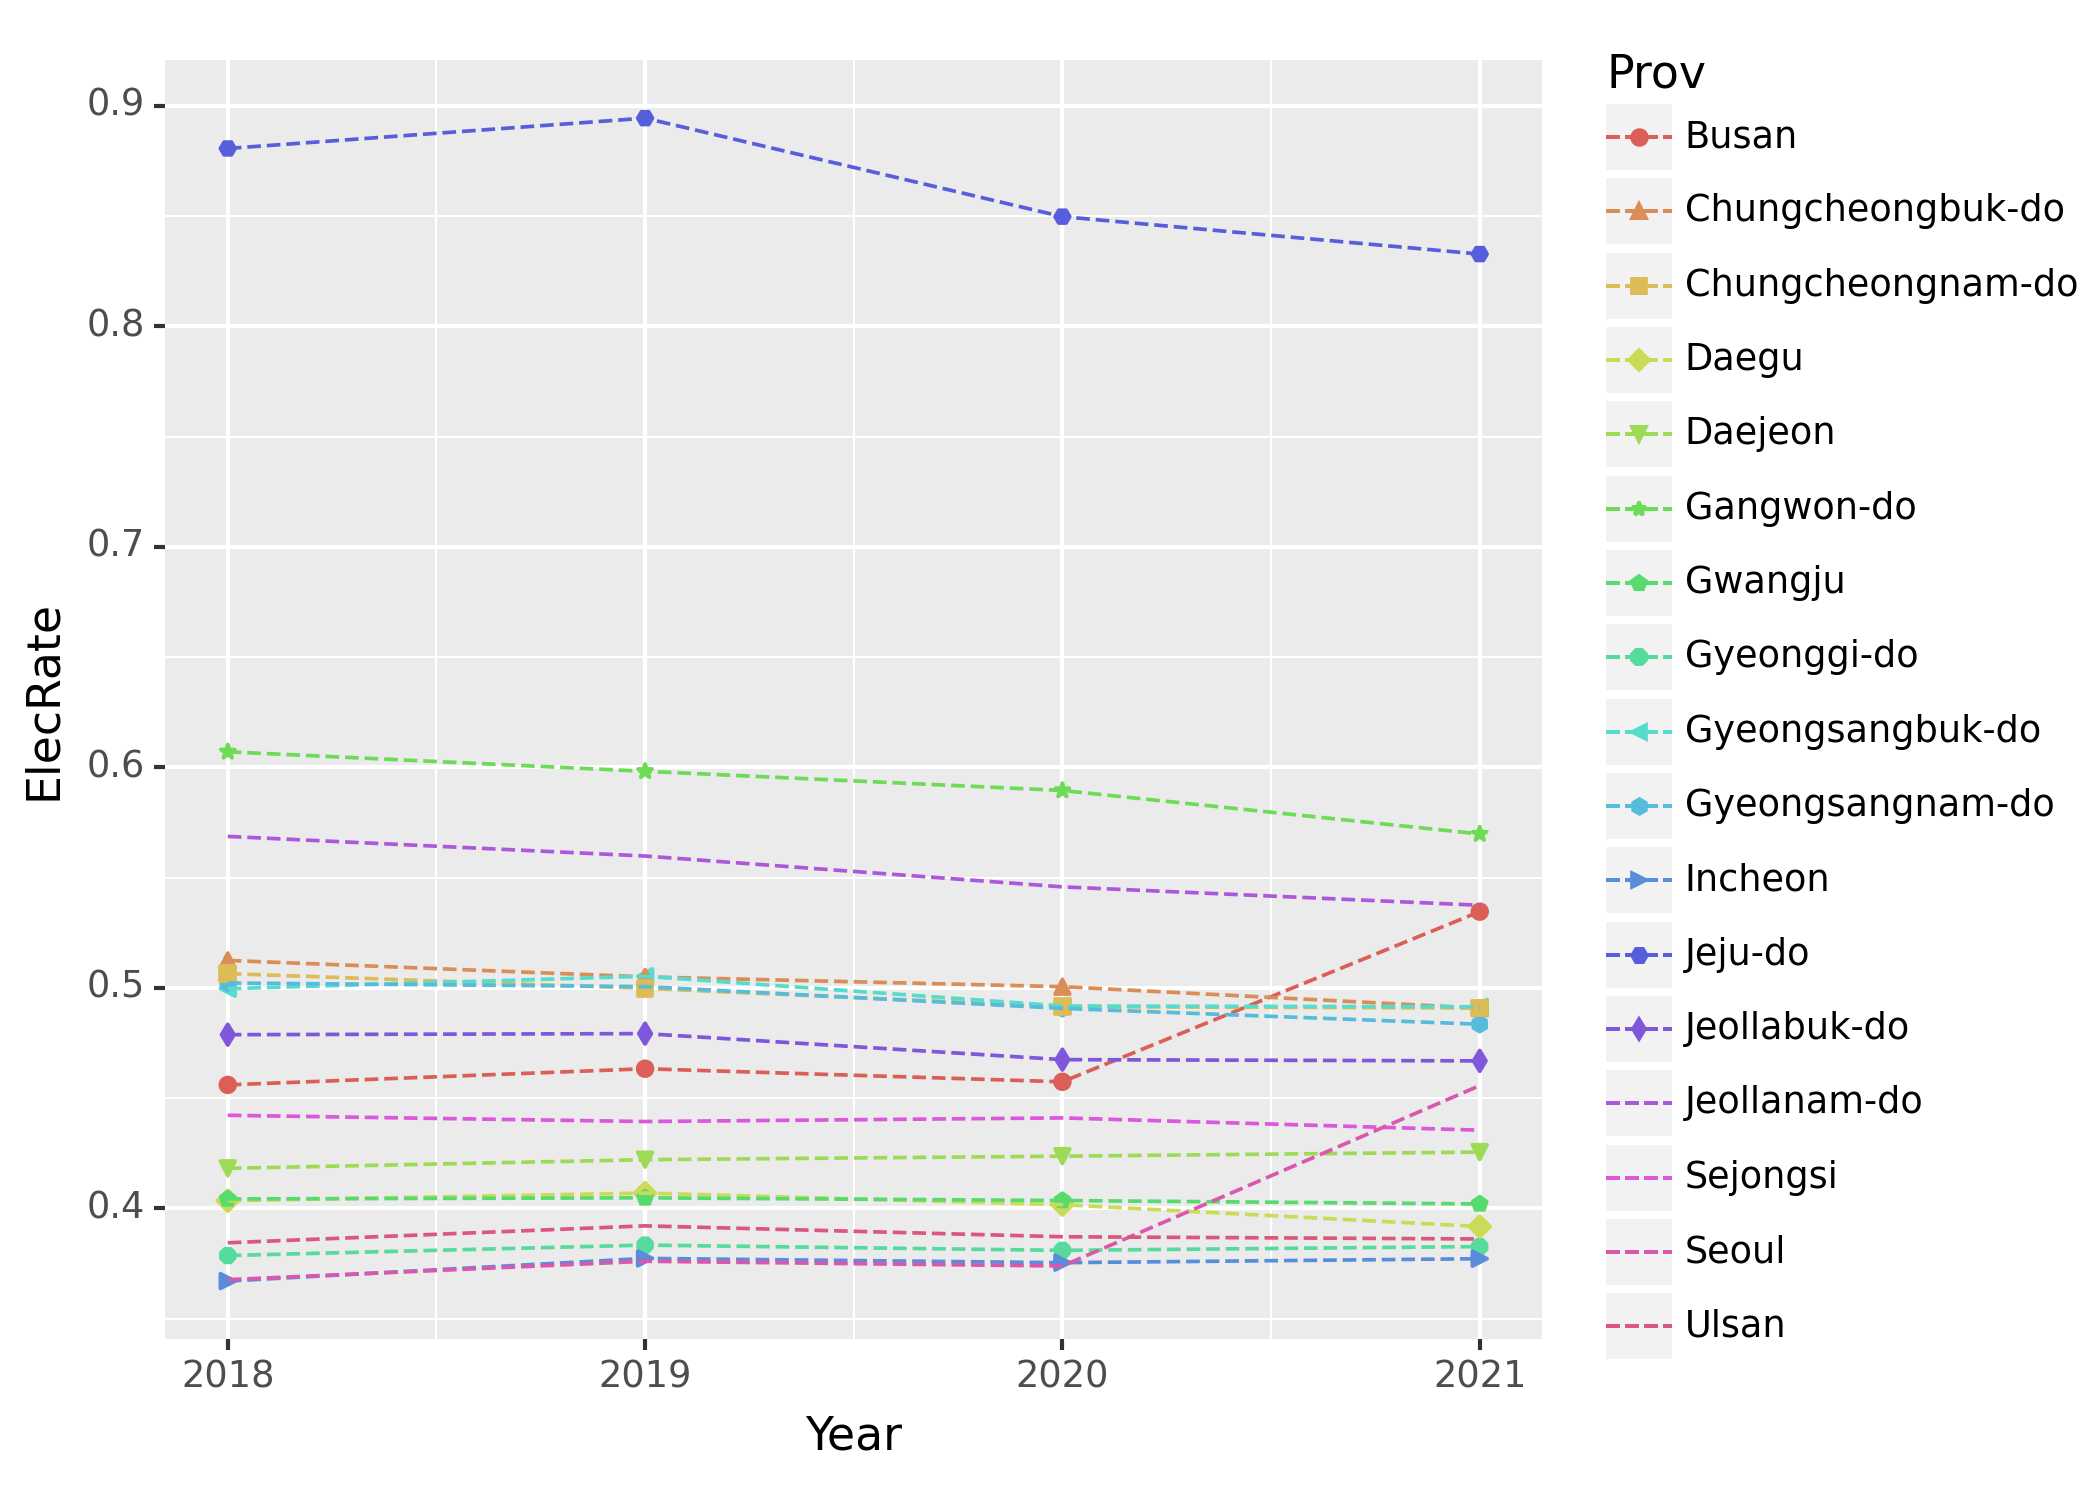

In [372]:
fig = ggplot(tidydata)
point = geom_point(aes(x='Year',y='ElecRate',color='Prov',shape='Prov'))
line = geom_line(aes(x='Year',y='ElecRate',color='Prov'),linetype='dashed')
fig = (fig + point + line).draw()
fig.set_dpi(150)
fig.set_size_inches(7,5)
fig

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/mizani/palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 16 values requested.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 12 rows containing missing values.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/mizani/palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 16 values requested.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/guides/guides.py:259: PlotnineWarning: geom_point legend : Removed 3 rows containing missing values.

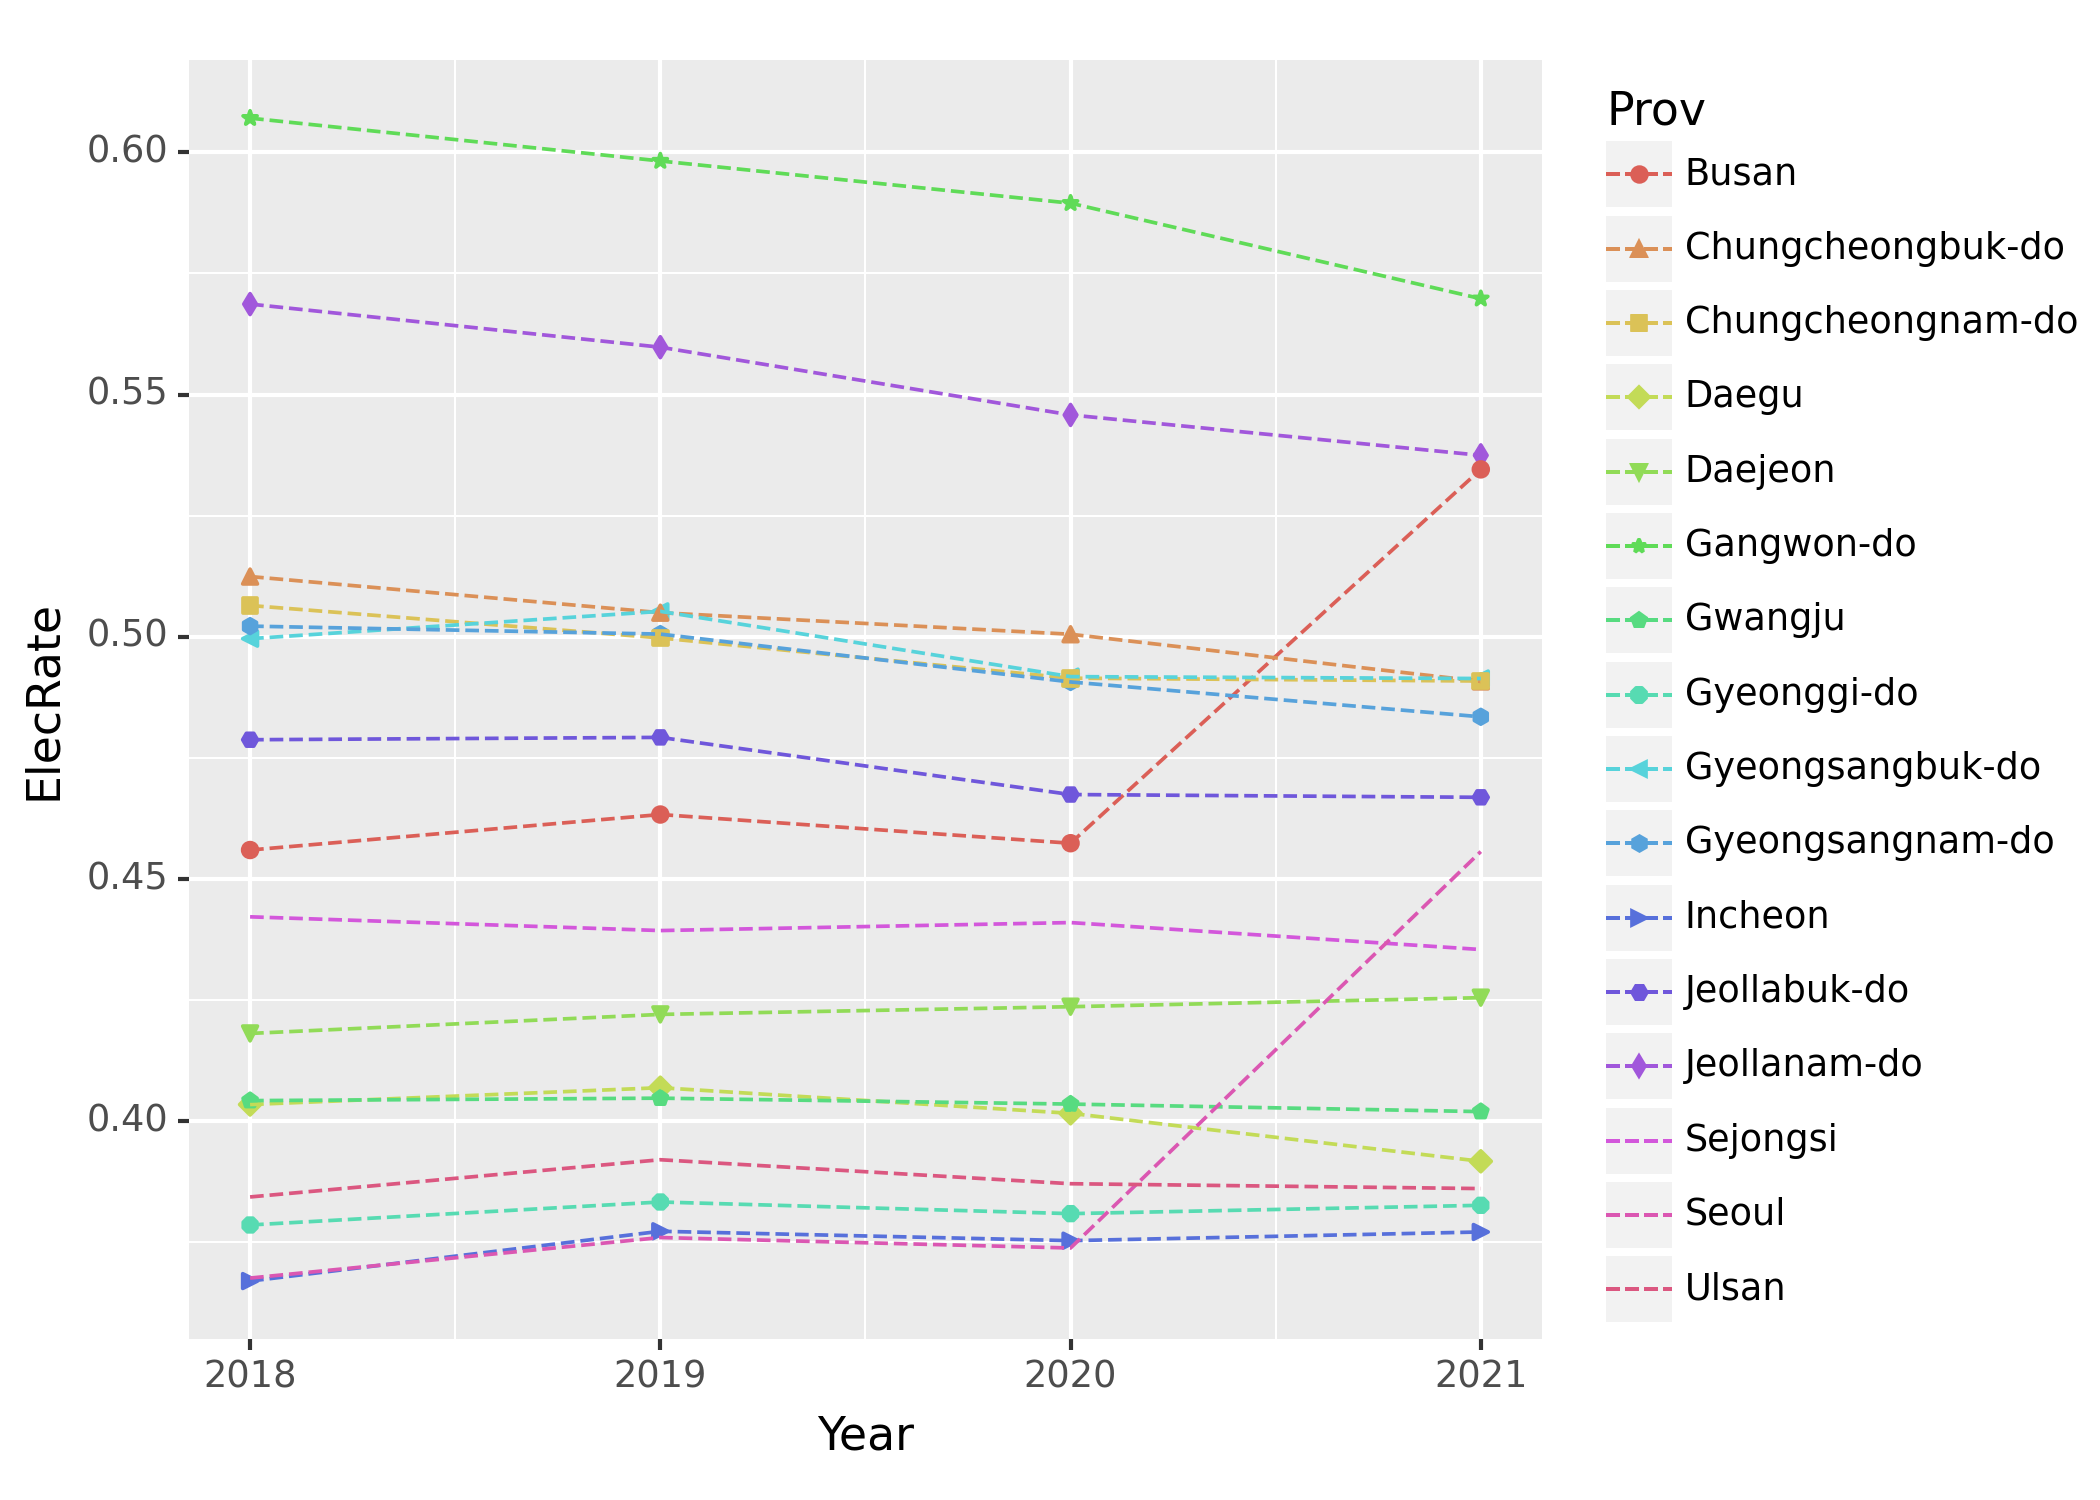

In [371]:
fig = ggplot(tidydata.query('Prov != "Jeju-do"'))
point = geom_point(aes(x='Year',y='ElecRate',color='Prov',shape='Prov'))
line = geom_line(aes(x='Year',y='ElecRate',color='Prov'),linetype='dashed')
fig = (fig + point + line).draw()
fig.set_dpi(150)
fig.set_size_inches(7,5)
fig

# 5. `pd.merge()` 의 이용

`before`에서 `after`로 가는 일반적인 방법이 있을까?

In [341]:
before = df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)\
    .drop(['BldgCount','Area'],axis=1)
after = before\
    .melt(id_vars=['Year','Prov','Reg']).rename({'variable':'Type','value':'EnergyUse'},axis=1)\
    .pivot_table(index=['Year','Prov','Type'],values='EnergyUse',aggfunc='sum').reset_index()\
    .set_index(['Year','Prov','Type']).unstack()\
    .assign(ElecRate = lambda df: df[('EnergyUse','Elec')]/(df[('EnergyUse','Elec')]+df[('EnergyUse','Gas')]+df[('EnergyUse','Heat')]))\
    .iloc[:,-1].reset_index().set_axis(['Year','Prov','ElecRate'],axis=1)
display('before',before)
display('after',after)

/tmp/ipykernel_288950/2643872.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

In [342]:
big = before\
    .melt(id_vars=['Year','Prov','Reg']).rename({'variable':'Type','value':'EnergyUse'},axis=1)\
    .pivot_table(index=['Year','Prov','Type'],values='EnergyUse',aggfunc='sum').reset_index()
small = big.pivot_table(index=['Year','Prov'],values='EnergyUse',aggfunc='sum').reset_index().rename({'EnergyUse':'EnergyUse_TypeSum'},axis=1)

In [350]:
big.merge(small).query('Type=="Elec"')\
.eval('ElecRate = EnergyUse/EnergyUse_TypeSum')\
.loc[:,['Year','Prov','ElecRate']].reset_index(drop=True)